<h1 style="font-size:240%; color:blue; text-align:center; line-height:45px;"> 1. Dilatación Direccional </h1>

<p style="font-size:135%;">Como no es una buena alternativa realizar la operación morfológica de dilatación o erosión en imágenes RGB trabajando los 3 canales por separado (Procesamiento Marginal), se realizará una implementación de la dilatación en imágenes RGB trabajando en el modelo de color HSI y operando solamente en el canal de Intensidad, usando funciones de la librería OpenCV.</p>

<p style="font-size:135%;">Como la dilatación requiere de un elemento estructurante, OpenCV maneja 3 Kernel aplicados a morfología en imágenes (MORPH_RECT, MORPH_ELLIPSE, MORPH_CROSS) de tamaño mxn, estos están definidos de la siguiente forma (Para tamaño 5x5):</p>

$MORPH\_RECT_{5x5} = \left(\begin{array}{ccccc}
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \end{array} \right)$

$MORPH\_ELLIPSE_{5x5} = \left(\begin{array}{ccccc}
0 & 0 & 1 & 0 & 0 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
0 & 0 & 1 & 0 & 0 \end{array} \right)$

$MORPH\_CROSS_{5x5} = \left(\begin{array}{ccccc}
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 \\
1 & 1 & 1 & 1 & 1 \\
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 \end{array} \right)$

<p style="font-size:135%;">En el siguiente código, se ilustra la implementación de la dilatación en OpenCV con los 3 kernel que maneja OpenCV y con un Kernel adicional que toma la forma de borde rectangular:</p>

$MORPH\_BORDER\_RECT_{5x5} = \left(\begin{array}{ccccc}
1 & 1 & 1 & 1 & 1 \\
1 & 0 & 0 & 0 & 1 \\
1 & 0 & 0 & 0 & 1 \\
1 & 0 & 0 & 0 & 1 \\
1 & 1 & 1 & 1 & 1 \end{array} \right)$

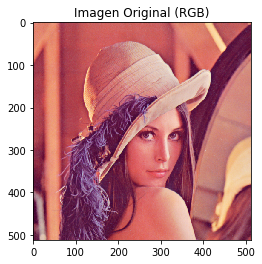

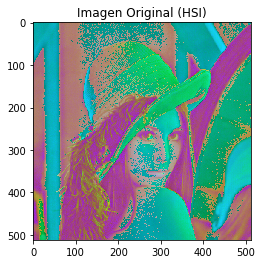

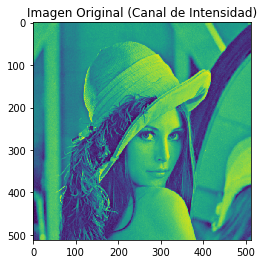

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagenOriginalRGB = cv2.imread('Figures/Lenna.png')
imagenOriginalRGB2 = cv2.imread('Figures/Frutas.jpg')
imagenOriginalRGB = cv2.cvtColor(imagenOriginalRGB, cv2.COLOR_BGR2RGB)
imagenOriginalRGB2 = cv2.cvtColor(imagenOriginalRGB2, cv2.COLOR_BGR2RGB)
alto, ancho = imagenOriginalRGB.shape[:2]
alto2, ancho2 = imagenOriginalRGB2.shape[:2]
imagenOriginalHIS = cv2.cvtColor(imagenOriginalRGB, cv2.COLOR_RGB2HLS)
imagenOriginalHIS2 = cv2.cvtColor(imagenOriginalRGB2, cv2.COLOR_RGB2HLS)
imagenOriginalI = np.zeros((alto, ancho), np.uint8)
imagenOriginalI2 = np.zeros((alto2, ancho2), np.uint8)
for i in range(alto):
    for j in range(ancho):
        imagenOriginalI[i][j] = imagenOriginalHIS[i][j][1]
for i in range(0, alto2):
    for j in range(0, ancho2):
        imagenOriginalI2[i][j] = imagenOriginalHIS2[i][j][1]

kernelRectangular = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
kernelElipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
kernelCruz = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

kernelBorde = np.array([[1, 1, 1, 1, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 1, 1, 1, 1]], np.uint8)

dilationRectangular = cv2.dilate(imagenOriginalI, kernelRectangular, iterations = 1)
dilationElipse = cv2.dilate(imagenOriginalI, kernelElipse, iterations = 1)
dilationCruz = cv2.dilate(imagenOriginalI, kernelCruz, iterations = 1)
dilationBorde = cv2.dilate(imagenOriginalI, kernelBorde, iterations = 1)
dilationRectangular2 = cv2.dilate(imagenOriginalI2, kernelRectangular, iterations = 1)
dilationElipse2 = cv2.dilate(imagenOriginalI2, kernelElipse, iterations = 1)
dilationCruz2 = cv2.dilate(imagenOriginalI2, kernelCruz, iterations = 1)
dilationBorde2 = cv2.dilate(imagenOriginalI2, kernelBorde, iterations = 1)

imagenHISDilatadaRectangular = imagenOriginalHIS.copy()
imagenHISDilatadaElipse = imagenOriginalHIS.copy()
imagenHISDilatadaCruz = imagenOriginalHIS.copy()
imagenHISDilatadaBorde = imagenOriginalHIS.copy()
imagenHISDilatadaRectangular2 = imagenOriginalHIS2.copy()
imagenHISDilatadaElipse2 = imagenOriginalHIS2.copy()
imagenHISDilatadaCruz2 = imagenOriginalHIS2.copy()
imagenHISDilatadaBorde2 = imagenOriginalHIS2.copy()

for i in range(alto):
    for j in range(ancho):
        imagenHISDilatadaRectangular[i][j][1] = dilationRectangular[i][j]
        imagenHISDilatadaElipse[i][j][1] = dilationElipse[i][j]
        imagenHISDilatadaCruz[i][j][1] = dilationCruz[i][j]
        imagenHISDilatadaBorde[i][j][1] = dilationBorde[i][j]
for i in range(alto2):
    for j in range(ancho2):
        imagenHISDilatadaRectangular2[i][j][1] = dilationRectangular2[i][j]
        imagenHISDilatadaElipse2[i][j][1] = dilationElipse2[i][j]
        imagenHISDilatadaCruz2[i][j][1] = dilationCruz2[i][j]
        imagenHISDilatadaBorde2[i][j][1] = dilationBorde2[i][j]

imagenRGBDilatadaRectangular = cv2.cvtColor(imagenHISDilatadaRectangular, cv2.COLOR_HLS2RGB)
imagenRGBDilatadaElipse = cv2.cvtColor(imagenHISDilatadaElipse, cv2.COLOR_HLS2RGB)
imagenRGBDilatadaCruz = cv2.cvtColor(imagenHISDilatadaCruz, cv2.COLOR_HLS2RGB)
imagenRGBDilatadaBorde = cv2.cvtColor(imagenHISDilatadaBorde, cv2.COLOR_HLS2RGB)
imagenRGBDilatadaRectangular2 = cv2.cvtColor(imagenHISDilatadaRectangular2, cv2.COLOR_HLS2RGB)
imagenRGBDilatadaElipse2 = cv2.cvtColor(imagenHISDilatadaElipse2, cv2.COLOR_HLS2RGB)
imagenRGBDilatadaCruz2 = cv2.cvtColor(imagenHISDilatadaCruz2, cv2.COLOR_HLS2RGB)
imagenRGBDilatadaBorde2 = cv2.cvtColor(imagenHISDilatadaBorde2, cv2.COLOR_HLS2RGB)

plt.figure(1000)
plt.subplot(111)
plt.imshow(imagenOriginalRGB)
plt.title('Imagen Original (RGB)')
plt.show()
plt.subplot(111)
plt.imshow(imagenOriginalHIS)
plt.title('Imagen Original (HSI)')
plt.show()
plt.subplot(111)
plt.imshow(imagenOriginalI)
plt.title('Imagen Original (Canal de Intensidad)')
plt.show()

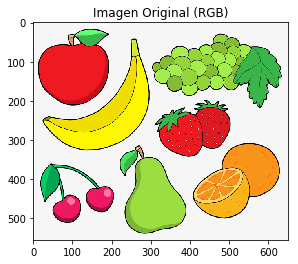

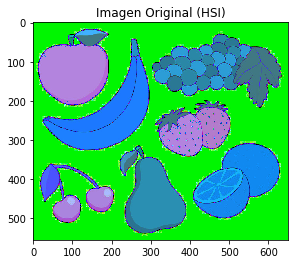

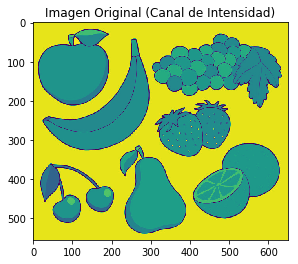

In [36]:
plt.subplot(111)
plt.imshow(imagenOriginalRGB2)
plt.title('Imagen Original (RGB)')
plt.show()
plt.subplot(111)
plt.imshow(imagenOriginalHIS2)
plt.title('Imagen Original (HSI)')
plt.show()
plt.subplot(111)
plt.imshow(imagenOriginalI2)
plt.title('Imagen Original (Canal de Intensidad)')
plt.show()

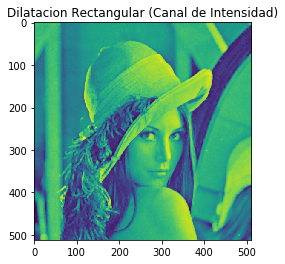

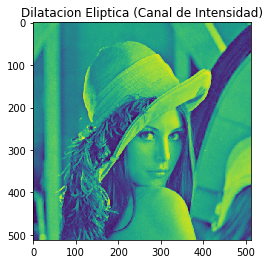

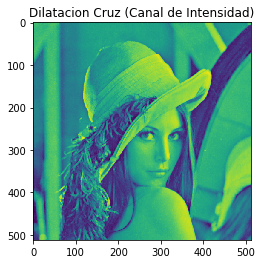

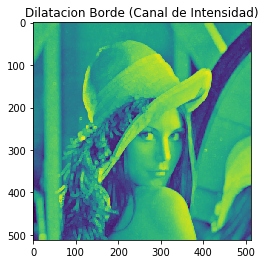

In [37]:
plt.subplot(111)
plt.imshow(dilationRectangular)
plt.title('Dilatacion Rectangular (Canal de Intensidad)')
plt.show()
plt.subplot(111)
plt.imshow(dilationElipse)
plt.title('Dilatacion Eliptica (Canal de Intensidad)')
plt.show()
plt.subplot(111)
plt.imshow(dilationCruz)
plt.title('Dilatacion Cruz (Canal de Intensidad)')
plt.show()
plt.subplot(111)
plt.imshow(dilationBorde)
plt.title('Dilatacion Borde (Canal de Intensidad)')
plt.show()

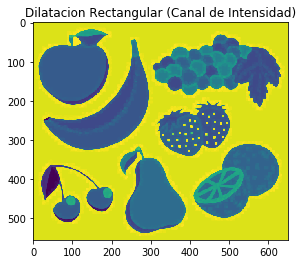

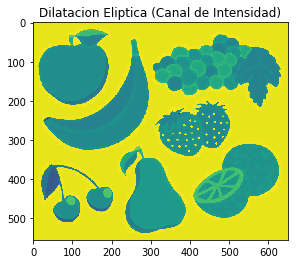

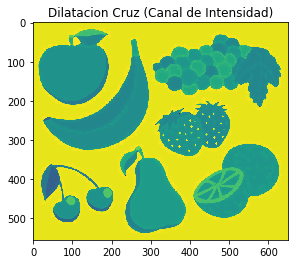

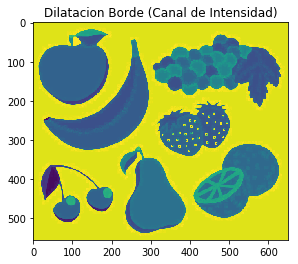

In [32]:
plt.subplot(111)
plt.imshow(dilationRectangular2)
plt.title('Dilatacion Rectangular (Canal de Intensidad)')
plt.show()
plt.subplot(111)
plt.imshow(dilationElipse2)
plt.title('Dilatacion Eliptica (Canal de Intensidad)')
plt.show()
plt.subplot(111)
plt.imshow(dilationCruz2)
plt.title('Dilatacion Cruz (Canal de Intensidad)')
plt.show()
plt.subplot(111)
plt.imshow(dilationBorde2)
plt.title('Dilatacion Borde (Canal de Intensidad)')
plt.show()

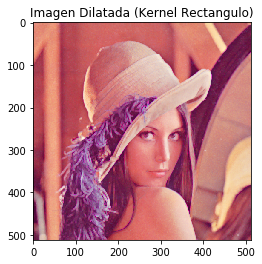

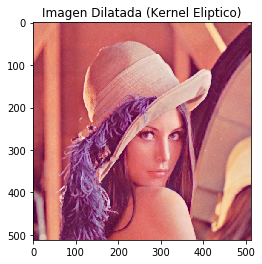

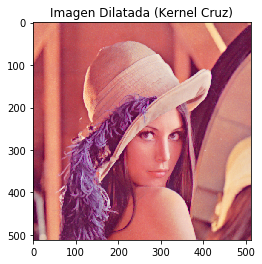

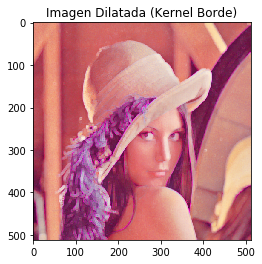

In [38]:
plt.subplot(111)
plt.imshow(imagenRGBDilatadaRectangular)
plt.title('Imagen Dilatada (Kernel Rectangulo)')
plt.show()
plt.subplot(111)
plt.imshow(imagenRGBDilatadaElipse)
plt.title('Imagen Dilatada (Kernel Eliptico)')
plt.show()
plt.subplot(111)
plt.imshow(imagenRGBDilatadaCruz)
plt.title('Imagen Dilatada (Kernel Cruz)')
plt.show()
plt.subplot(111)
plt.imshow(imagenRGBDilatadaBorde)
plt.title('Imagen Dilatada (Kernel Borde)')
plt.show()

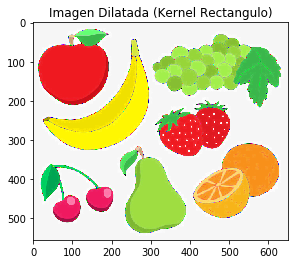

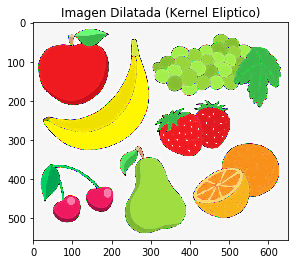

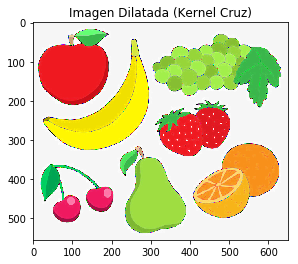

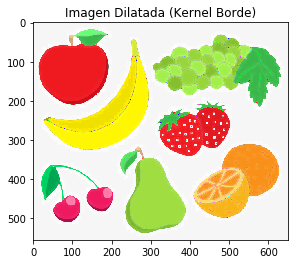

In [39]:
plt.subplot(111)
plt.imshow(imagenRGBDilatadaRectangular2)
plt.title('Imagen Dilatada (Kernel Rectangulo)')
plt.show()
plt.subplot(111)
plt.imshow(imagenRGBDilatadaElipse2)
plt.title('Imagen Dilatada (Kernel Eliptico)')
plt.show()
plt.subplot(111)
plt.imshow(imagenRGBDilatadaCruz2)
plt.title('Imagen Dilatada (Kernel Cruz)')
plt.show()
plt.subplot(111)
plt.imshow(imagenRGBDilatadaBorde2)
plt.title('Imagen Dilatada (Kernel Borde)')
plt.show()

<p style="font-size:135%;"><b>Evaluación: </b>A partir de los resultados de la dilatación en imágenes RGB, se puede afirmar que para cada tipo de kernel hay muy pequeñas diferencias (Manteniendo el tamaño de Kernel), visualmente se observa un efecto de extrusión (Un efecto visual en el que un objeto 2D se expande a 3D con un mismo corte transversal, por ejemplo, de un círculo a un cilindro, de un rectángulo a un prisma) para el caso de la imagen de Lenna, además de una evidente pérdida de detalles en los contornos como en el cabello; y para el caso de la imagen de las frutas, los contornos de cada fruta son reemplazados por un contorno del color de cada fruta. Conforme se aumente el tamaño de kernel, más pérdida de detalles como en los contornos se puede evidenciar, aunque haya una dilatación un poco más gruesa. En ambos casos, visualmente se tiene un buen resultado de esta operación morfológica.</p>